In [1]:
import numpy as np
import matplotlib.pyplot as plt

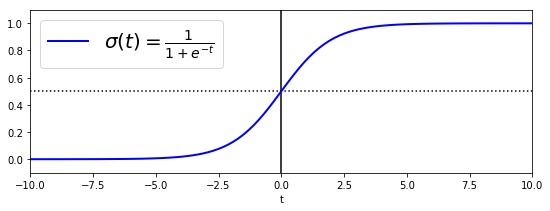

In [3]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

In [2]:
np.random.seed(88)
m1 = [0,0]
m2 = [2,5]
n = 3000

x1 = np.random.normal(m1,size=[n,2])
x2 = np.random.normal(m2,size=[n,2])

features = np.vstack((x1,x2)).astype(np.float32)
labels = np.hstack((np.zeros(n),np.ones(n)))

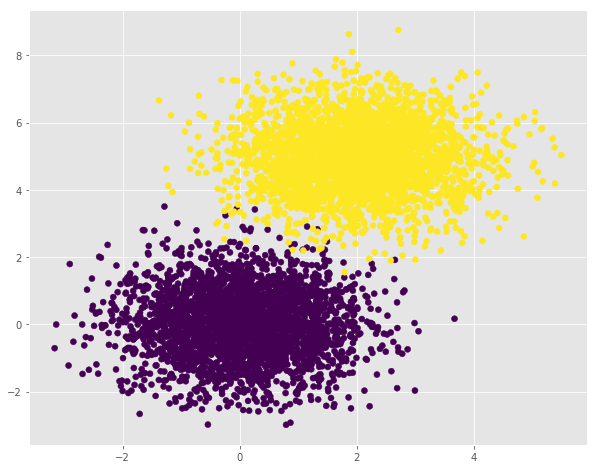

In [33]:
plt.style.use('ggplot')
plt.figure(figsize=(10,8))
plt.scatter(features[:,0],features[:,1],c=labels)
plt.show()

In [3]:
# build the model

# account for model intercept
x0_features = np.c_[np.ones((len(features),1)),features]

# randomly initialize parameters
theta = np.random.randn(3,1)

In [4]:
# define logit function
def logit(output):
    return 1/(1+np.exp(-output))

In [5]:
# Logistic Regression from scratch
adj_rate = .01
iterations = 100000

for iteration in range(iterations):
    #transformation
    linear_output = np.dot(x0_features,theta)
    probs = logit(linear_output)
    
    #update
    performance = labels.reshape(6000,1) - probs
    ll = np.dot(x0_features.T,performance)
    theta = theta + adj_rate*ll

In [6]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, C=0)
clf.fit(x0_features,labels)

LogisticRegression(C=1000000000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [14]:
print("sklearn params: ", clf.coef_[0][1:])
print("custom params: ", theta[1] , theta[2])

sklearn params:  [ 2.45615386  5.26486839]
custom params:  [ 2.54185458] [ 5.43879201]


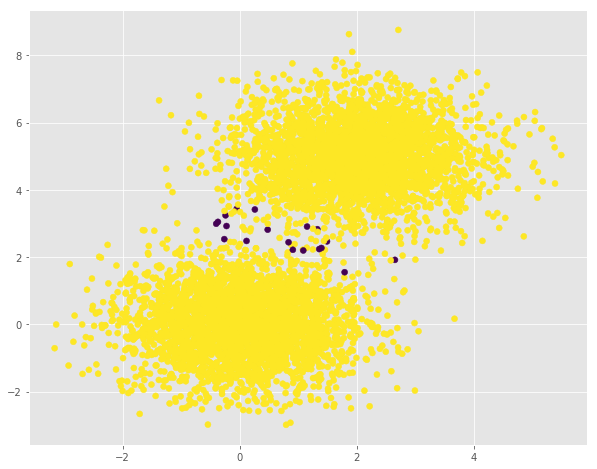

In [17]:
plt.style.use('ggplot')
plt.figure(figsize=(10,8))
plt.scatter(features[:,0],features[:,1],c=(np.round(probs)==labels.reshape(6000,1)))
plt.show()

In [7]:
print("custom accuracy: {0}".format((np.round(probs)==labels.reshape(6000,1)).sum().astype(float)/6000))

custom accuracy: 0.9968333333333333
